In [55]:
import pandas as pd
import numpy as np
import pylab as py
from sklearn.tree import DecisionTreeClassifier

In [56]:
pwd

'C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Decision Tree'

In [57]:
my_data=pd.read_csv('C:\\Users\\lenovo\\Documents\\Jupyter Projects\\ChurnData.csv')
my_data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11,33,7,136,5,5,0,1,1,4.40,...,1,0,1,1,0,1.482,3.033,4.913,4,Yes
1,33,33,12,33,2,0,0,0,0,9.45,...,0,0,0,0,0,2.246,3.240,3.497,1,Yes
2,23,30,9,30,1,2,0,0,0,6.30,...,0,0,0,1,0,1.841,3.240,3.401,3,No
3,38,35,5,76,2,10,1,1,1,6.05,...,1,1,1,1,1,1.800,3.807,4.331,4,No
4,7,35,14,80,2,15,0,1,0,7.10,...,0,0,1,1,0,1.960,3.091,4.382,3,No


In [58]:
my_data.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [59]:
X = my_data[['tenure', 'age', 'address', 'income', 'ed', 'employ']]
X[0:5]

,tenure,age,address,income,ed,employ
0,11,33,7,136,5,5
1,33,33,12,33,2,0
2,23,30,9,30,1,2
3,38,35,5,76,2,10
4,7,35,14,80,2,15


In [60]:
y = my_data[['churn']]
y[0:5]

,churn
0,Yes
1,Yes
2,No
3,No
4,No


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 4)
print("Train Set:",X_train.shape,y_train)
print("Test Set:",X_test.shape,y_test.shape)

Train Set: (100, 6)     churn
13     No
15    Yes
86     No
43    Yes
60     No
..    ...
104    No
129    No
183    No
174   Yes
122    No

[100 rows x 1 columns]
Test Set: (100, 6) (100, 1)


In [62]:
ChurnTree=DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)
ChurnTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
predTree=ChurnTree.predict(X_test)
print(y_test[0:5])
print(predTree[0:5])

    churn
11     No
99     No
128   Yes
175    No
1     Yes
['No' 'No' 'No' 'No' 'No']


In [64]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("The Accuracy Score : ",metrics.accuracy_score(y_test,predTree))

The Accuracy Score :  0.72


In [65]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

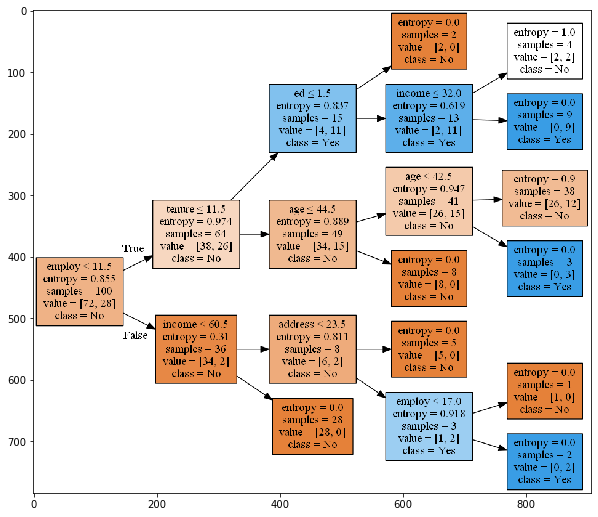

In [92]:
dot_data = StringIO()
filename = "ChurnTree.png"
FeatureNames = my_data.columns[0:6]
TargetNames = my_data["churn"].unique().tolist()
out=tree.export_graphviz(ChurnTree,feature_names=FeatureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True ,  special_characters=True,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10,20))
plt.imshow(img,interpolation = 'nearest')
plt.show()